<a href="https://colab.research.google.com/github/soyeunju/ESAA/blob/main/25-1/Assignments/0314_Week2_HM_HOM_Ensemble_RF_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 7.5 부스팅

부스팅은 약한 학습기를 여러 개 연결하여 강한 학습기를 만드는 앙상블 방법.

* 에이다부스트 부스팅
* 그레이디언트 부스팅

#### 7.5.1 에이다부스트
이전 예측기를 보완하는 새로운 예측기를 만드는 방법은 이전 모델이 과소적합했던 훈련 샘플의 가중치를 더 높이는 것.



➡️ 새로운 예측기는 학습하기 어려운 샘플에 점점 더 맞춰지게 됨.

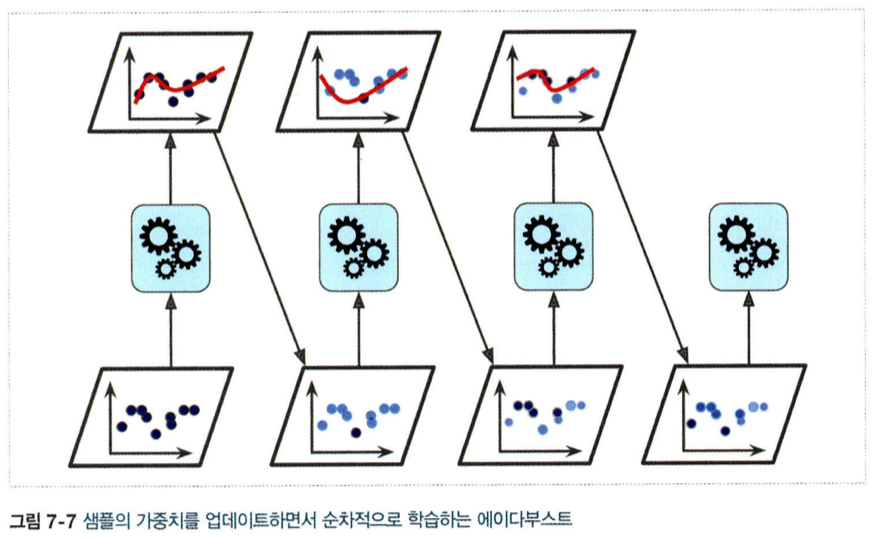

아래 그림은 moons 데이터셋에 훈련시킨 다섯 개의 연속된 예측기의 결정 경계.

잘못 분류한 샘플의 가중치를 높여가며 다음 분류기가 더 정확하게 예측하도록 함.

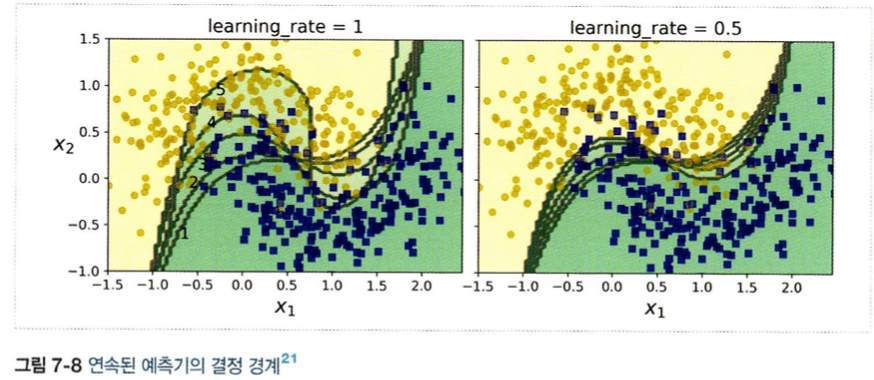

오른쪽 그림은 왼쪽과 비슷하지만 학습률이 절반. 즉 잘못 분류된 샘플의 가중치는 반복마다 절반만 높아짐.

모든 예측기가 훈련을 마치면 앙상블은 배깅이나 페이스팅과 비슷한 방식으로 예측을 만듦. 가중치가 적용된 훈련 세트의 전반적인 정확도에 따라 예측기마다 다른 가중치 적용

📈 7-1 j번째 예측기의 가중치가 적용된 에러율

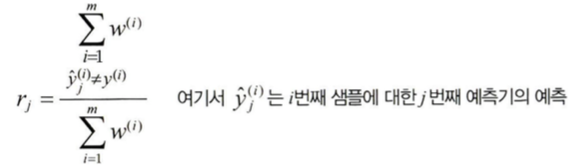

📈 7-2 예측기 가중치

$a_j = ηlog(\frac{1-r_j}{r_j})$

예측기가 정확할수록 가중치가 높아짐.

📈 7-3 가중치 업데이트 규칙

$w^{(i)} =
\begin{cases}
w^{(i)}, & \text{if } \hat{y}_j^{(i)} = y^{(i)} \\
w^{(i)}exp(a_j), & \text{if } \hat{y}_j^{(i)} ≠ y^{(i)}
\end{cases}$

그런 다음 모든 샘플의 가중치를 정규화 $∑_{i=1}^m w^{(i)}$로 나눔

예측을 할 때 에이다부스트는 단순히 모든 예측기의 예측을 계산하고 예측기 가중치 $a_j$를 더해 예측 결과를 만듦.

$\hat{y(X)} = argmax_k ∑_{j=1}^{N}a_j$

사이킷런은 SAMME라는 에이다부스트의 다중 클래스 버전을 사용함. 예측기가 클래스의 확률을 추정할 수 있다면 사이킷런은 SAMME.R이라는 SAMME 변종을 사용함.

다음 코드는 `AdaBoostClassifier`를 사용하여 200개의 아주 얕은 결정 트리를 기반으로 하는 에이다부스트 분류기를 훈련시킴. `max_depth = 1`는 결정 노드 하나와 리프 노드 두 개로 이루어진 트리.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# import package
import numpy as np
import os

#5장에서 소개한 moons dataset 불러오기
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
X,y = make_moons(n_samples=100, noise=0.15)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth = 1), n_estimators = 200,
    algorithm = "SAMME", learning_rate = 0.5
)

ada_clf.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200)

#### 7.5.2 그레이디언트 부스팅

그레이디언트 부스팅은 에이다부스트처럼 반복마다 샘플의 가중치를 수정하는 대신 이전 예측기가 만든 `잔여 오차`에 새로운 예측기를 학습시킴.

최종 예측값은 모든 트리의 예측값을 합산하여 얻음. 이는 각 트리가 예측한 잔여 오차를 보정하면서, 점차적으로 모델을 개선하는 방식.

그레이디언트 트리 부스팅 또는 그레이디언트 부스티드 회귀 트리(GBRT) : 결정 트리를 기반 예측기로 사용하는 간단 회귀 문제

그레이디언트 부스팅에서 중요한 점은 여러 개의 약한 모델(여기서는 결정 트리)을 사용하여 강한 모델을 만든다는 것.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2) # 제한된 깊이
tree_reg1.fit(X,y)
y2 = y - tree_reg1.predict(X)  # 잔여 오차

tree_reg2 = DecisionTreeRegressor(max_depth=2) # 새로운 예측기
tree_reg2.fit(X,y2) # 이전 예측기가 만든 잔여 오차에 새로운 예측기를 학습시켜 예측.

DecisionTreeRegressor(max_depth=2)

In [ ]:
y3 = y2 - tree_reg2.predict(X) # 잔여 오차

tree_reg3 = DecisionTreeRegressor(max_depth=2) # 새로운 예측기
tree_reg3.fit(X,y3) # 이전 예측기가 만든 잔여 오차에 새로운 예측기를 학습시킴

DecisionTreeRegressor(max_depth=2)

In [ ]:
#y_pred = sum(tree.predict(X_new) for tree in (tree_reg1,tree_reg2,tree_reg3))

`y_pred`는 각 트리가 만든 예측값을 누적하여 최종 예측값을 생성하는 것

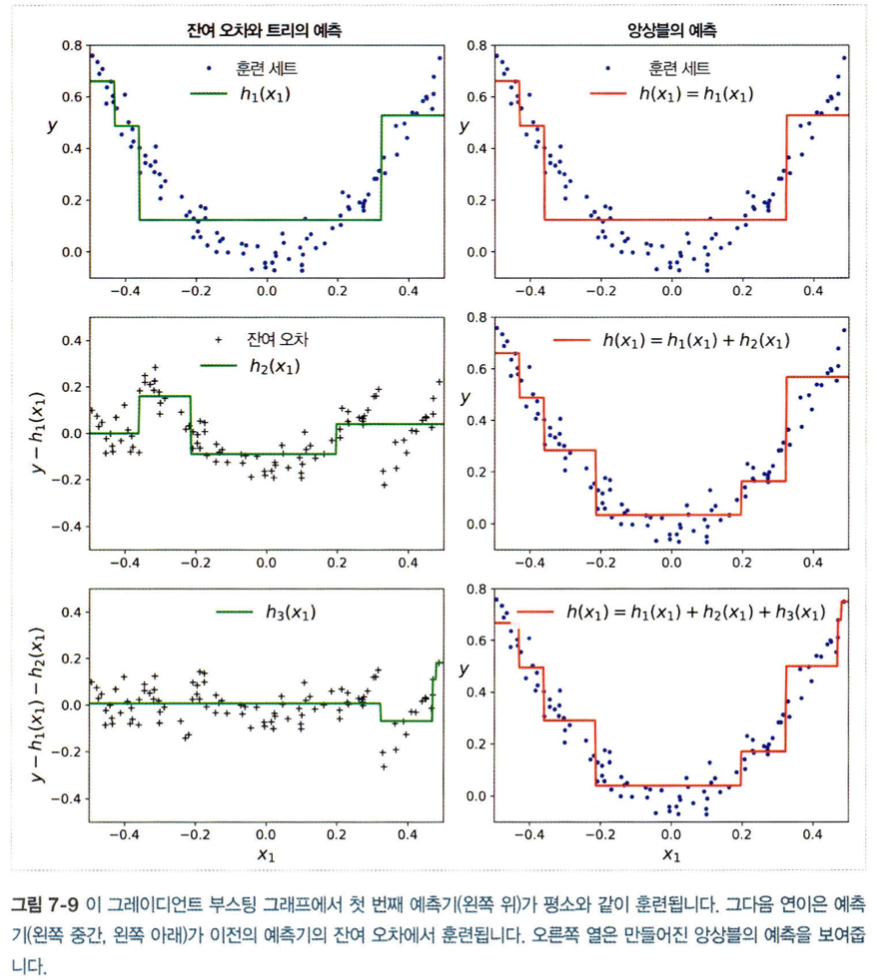

`learning_rate`매개변수가 각 트리의 기여도를 조절.

`learning_rate`⬇️ `n_estimators`⬆️ : 예측 성능 좋음

➡️ **축소**라 불리는 규제 방법

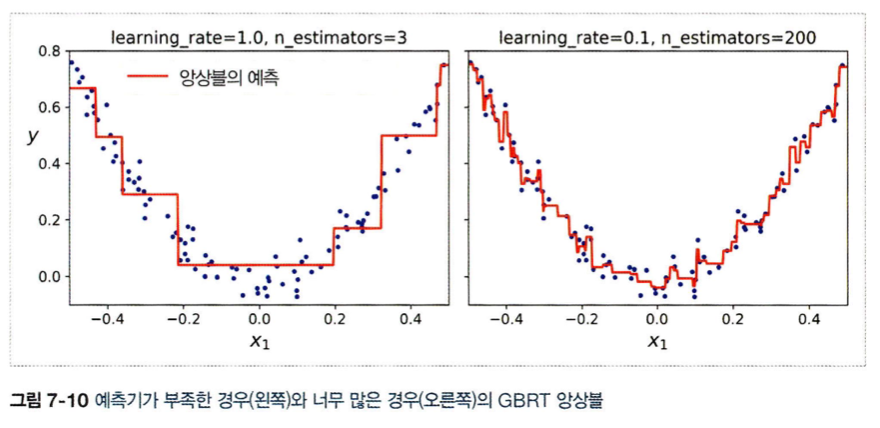

* 왼쪽은 훈련 세트를 학습하기에 트리가 충분하지 않음
* 오른쪽은 트리가 너무 많아 훈련 세트에 과대적합됨.

최적의 트리 개수를 찾기 위해 조기 종료 기법 사용.

`staged_predict()`메서드는 `n_estimators` 만큼의 트리들이 훈련된 후, 각 단계별로 예측을 반환.

📊 1) 많은 수의 트리를 먼저 훈련시키고 최적의 수를 찾기 위해 살펴보는 방법

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

X_train, X_val, y_train, y_val = train_test_split(X,y)

gbrt = GradientBoostingRegressor(max_depth = 2, n_estimators = 120)
gbrt.fit(X_train,y_train)

errors = [mean_squared_error(y_val,y_pred)
          for y_pred in gbrt.staged_predict(X_val)]

bst_n_estimators = np.argmin(errors) + 1

gbrt_best = GradientBoostingRegressor(max_depth = 2, n_estimators = bst_n_estimators)
gbrt_best.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=103)

In [ ]:
bst_n_estimators

103

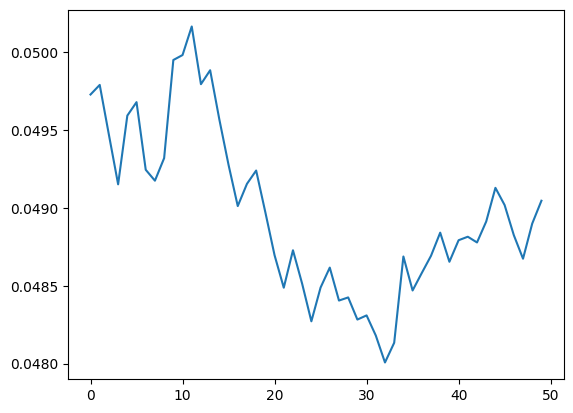

In [ ]:
import matplotlib.pyplot as plt
plt.plot(errors[70:])

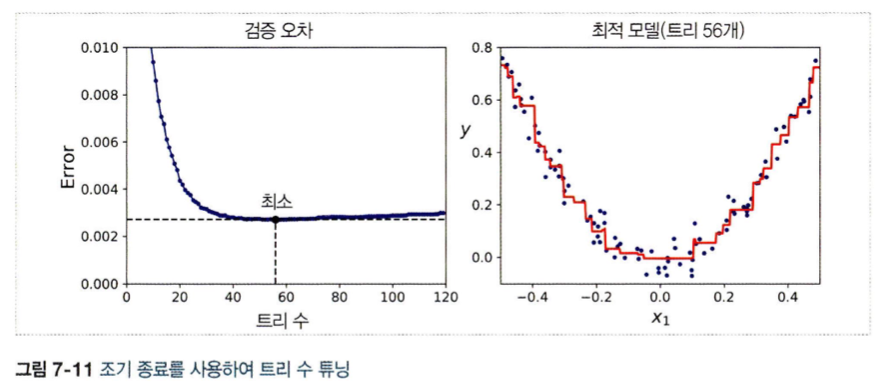

📊 2) 실제로 훈련 중지하는 방법으로 조기 종료 구현

`warm_start = True`로 설정하면 사이킷런이 `fit()` 메서드가 호출될 때 기존 트리를 유지하고 훈련을 추가할 수 있도록 해줌.

In [ ]:
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True)

min_val_error = float("inf")
error_going_up = 0

for n_estimators in range(1, 120):
  gbrt.n_estimators = n_estimators
  gbrt.fit(X_train, y_train)
  y_pred = gbrt.predict(X_test)
  val_error = mean_squared_error(y_test, y_pred)
  if val_error < min_val_error:
    min_val_error = val_error
    error_going_up = 0
  else:
    error_going_up += 1
    if error_going_up == 5:
      break

`GradientBoostingRegressor`

`subsample` 매개변수 : 각 트리가 훈련할 때 사용할 훈련 샘플의 비율을 지정 -> 편향 ⬆️, 분산 ⬇️

`loss` 매개변수 : 비용함수 지정

최적화된 그레이디언트 부스팅 구현으로 `XGBoost`파이썬 라이브러리가 있음.

In [ ]:
import xgboost

xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_val)

자동 조기 종료

In [ ]:
xgb_reg = xgboost.XGBRegressor(early_stopping_rounds = 2)
xgb_reg.fit(X_train,y_train, eval_set = [(X_val, y_val)])
y_pred = xgb_reg.predict(X_val)

[0]	validation_0-rmse:0.40517
[1]	validation_0-rmse:0.32763
[2]	validation_0-rmse:0.27757
[3]	validation_0-rmse:0.26147
[4]	validation_0-rmse:0.25632
[5]	validation_0-rmse:0.25653
[6]	validation_0-rmse:0.25036
[7]	validation_0-rmse:0.24386
[8]	validation_0-rmse:0.24196
[9]	validation_0-rmse:0.24077
[10]	validation_0-rmse:0.23998
[11]	validation_0-rmse:0.23943
[12]	validation_0-rmse:0.23643
[13]	validation_0-rmse:0.23409
[14]	validation_0-rmse:0.23403
[15]	validation_0-rmse:0.23243
[16]	validation_0-rmse:0.23201
[17]	validation_0-rmse:0.23163
[18]	validation_0-rmse:0.23067
[19]	validation_0-rmse:0.23027
[20]	validation_0-rmse:0.23006
[21]	validation_0-rmse:0.22996
[22]	validation_0-rmse:0.22991
[23]	validation_0-rmse:0.22982
[24]	validation_0-rmse:0.22977
[25]	validation_0-rmse:0.22972
[26]	validation_0-rmse:0.22959
[27]	validation_0-rmse:0.22957
[28]	validation_0-rmse:0.22954
[29]	validation_0-rmse:0.22946
[30]	validation_0-rmse:0.22946
[31]	validation_0-rmse:0.22947
[32]	validation_0-

### 7.6 스태킹

홀드아웃 세트 사용하여 블렌더를 학습시킴.

훈련 데이터를 2개의 서브셋으로 나누고 첫번째 서브셋으로 첫번째 레이어 훈련 > 예측기를 이용해 두번째 서브셋에 대한 예측 > 타깃은 그대로, 앞의 예측값을 입력 특성으로 사용하는 새로운 훈련 세트(3차원)로 블렌더 훈련


스태킹의 확장 방법
- 블렌더 자체도 여러 개의 모델을 사용하여 성능을 개선할 수 있음
- 블렌더의 레이어를 증가시키면 더욱 정교한 예측 가능
- 훈련 세트를 세 개의 서브셋으로 나누어 다층 스태킹 적용 가능